In [96]:
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
original_df = pd.read_csv('data/titanic.csv')


In [98]:
from titanic_preprocess import preprocess_titanic_no_tts

X, y = preprocess_titanic_no_tts(original_df)

In [99]:
X.head()

,Age_bucket_20-40,Age_bucket_above 40,Embarked_Q,Embarked_S,Sex_male,Pclass,SibSp,Parch,Fare
0,1.0,0.0,0.0,1.0,1.0,1.0,0.125,0.0,0.014151
1,1.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.139136
2,1.0,0.0,0.0,1.0,0.0,1.0,0.000,0.0,0.015469
3,1.0,0.0,0.0,1.0,0.0,0.0,0.125,0.0,0.103644
4,1.0,0.0,0.0,1.0,1.0,1.0,0.000,0.0,0.015713


In [48]:
X_not_hold, X_hold_out, y_not_hold, y_hold_out = train_test_split(X, y, test_size = .25, random_state = 42)

In [49]:
y_not_hold.value_counts()

0    341
1    242
Name: Survived, dtype: int64

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

## Base Model



stk = StratifiedKFold(n_splits = 3)

depths_roc = {}

for depth in range(2,20):
    mean_roc = []
    for train_ind, test_ind in stk.split(X_not_hold, y_not_hold):
        dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = depth)

        X_train = X_not_hold.iloc[train_ind]
        X_test = X_not_hold.iloc[test_ind]

        y_train = y_not_hold.iloc[train_ind]
        y_test = y_not_hold.iloc[test_ind]

        dt.fit(X_train, y_train)
        y_hat = dt.predict(X_test)
        y_hat_probas = dt.predict_proba(X_test)[:,1]

        mean_roc.append(roc_auc_score(y_test, y_hat_probas))

    depths_roc[depth] = sum(mean_roc)/len(mean_roc)


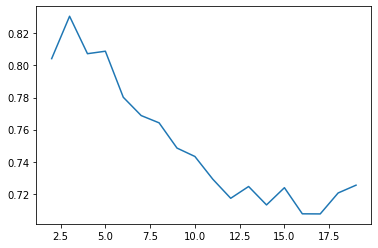

In [56]:
plt.plot(list(depths_roc.keys()), list(depths_roc.values()))

In [57]:
depths_roc

{2: 0.8042261133504945,
 3: 0.8306367970939768,
 4: 0.8073048022793792,
 5: 0.808852776036745,
 6: 0.78016532463392,
 7: 0.7687660286819966,
 8: 0.7642338888984725,
 9: 0.7485171831943381,
 10: 0.7432824408703759,
 11: 0.7291252452619951,
 12: 0.7172356768911609,
 13: 0.7245800916581852,
 14: 0.71310665406734,
 15: 0.7238345702652057,
 16: 0.7075635253325053,
 17: 0.7075006245355914,
 18: 0.7205489859522619,
 19: 0.7254043947818855}

In [58]:
from fit_and_print import fit_model_and_print_metrics

In [63]:
stk = StratifiedKFold()
stk_indices = stk.split(X_not_hold, y_not_hold)

In [64]:
stk_indices = list(stk_indices)

In [71]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

fit_model_and_print_metrics(stk_indices, X_not_hold, y_not_hold, dt, print_metrics = True)

accuracy_score: 0.7734555599840575
precision_score: 0.799923592625456
recall_score: 0.6198045267489712
f1_score: 0.693246412314711
roc_auc_score: 0.7511639722188678


{'accuracy': 0.7734555599840575,
 'precision': 0.799923592625456,
 'recall': 0.6198045267489712,
 'f1': 0.693246412314711,
 'roc_auc': 0.7511639722188678}

In [80]:
from sklearn.ensemble import RandomForestClassifier
depths_auc = {}
for depth in range(2,20):
    
    rf = RandomForestClassifier()
    results = fit_model_and_print_metrics(stk_indices, X_not_hold, y_not_hold, rf, print_metrics = False)
    depths_auc[depth] = results['roc_auc']

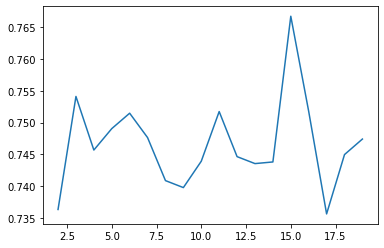

In [81]:
plt.plot(list(depths_auc.keys()), list(depths_auc.values()))

In [82]:
depths_auc

{2: 0.7362904814067289,
 3: 0.7541057025689977,
 4: 0.7456583475650778,
 5: 0.7490337028795083,
 6: 0.7514654024852364,
 7: 0.7476231549046329,
 8: 0.740842219787971,
 9: 0.7397412242367088,
 10: 0.7438970374012164,
 11: 0.7517255990270661,
 12: 0.7446196218860273,
 13: 0.7435231066987912,
 14: 0.7437812187931865,
 15: 0.766747684586206,
 16: 0.7517511634570968,
 17: 0.7355918201490835,
 18: 0.7449441967066689,
 19: 0.7473910744440037}

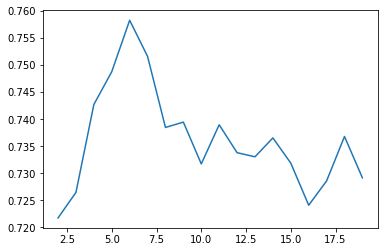

In [86]:
from sklearn.neighbors import KNeighborsClassifier

neighbors_auc = {}
for neighbors in range(2,20):
    
    knn = KNeighborsClassifier(n_neighbors= neighbors)
    results = fit_model_and_print_metrics(stk_indices, X_not_hold, y_not_hold, knn, print_metrics = False)
    neighbors_auc[neighbors] = results['roc_auc']
plt.plot(list(neighbors_auc.keys()), list(neighbors_auc.values()))

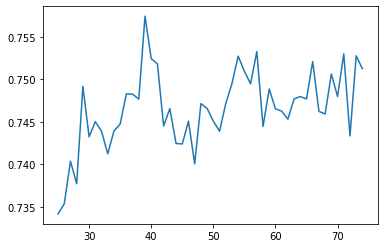

In [88]:
from sklearn.ensemble import AdaBoostClassifier

estimators_auc = {}
for estimators in range(25,75)
    
    ada = AdaBoostClassifier(n_estimators=estimators)
    results = fit_model_and_print_metrics(stk_indices, X_not_hold, y_not_hold, ada, print_metrics = False)
    estimators_auc[estimators] = results['roc_auc']
plt.plot(list(estimators_auc.keys()), list(estimators_auc.values()))

In [89]:
estimators_auc

{25: 0.7341784090538813,
 26: 0.7353696587831428,
 27: 0.7403771244592416,
 28: 0.7377264380770564,
 29: 0.749177326099582,
 30: 0.7432495050036322,
 31: 0.7450363795975243,
 32: 0.7438992775832293,
 33: 0.7412460395498743,
 34: 0.7439253092169952,
 35: 0.7447530145422555,
 36: 0.7482983361796824,
 37: 0.7482726160150732,
 38: 0.7476896176308793,
 39: 0.7574336546736665,
 40: 0.7524392826817398,
 41: 0.7518305641329369,
 42: 0.7445206226124692,
 43: 0.7465782357811935,
 44: 0.7424630094437449,
 45: 0.7424115691145268,
 46: 0.7450777450974755,
 47: 0.7400702794213765,
 48: 0.7471609226962302,
 49: 0.7465783915157718,
 50: 0.7451033095275061,
 51: 0.7438994333178077,
 52: 0.7471609226962302,
 53: 0.7495151503389743,
 54: 0.7527382930723511,
 55: 0.7509514184784588,
 56: 0.7494894301743652,
 57: 0.7532797702220152,
 58: 0.7444691822832509,
 59: 0.7488680851451255,
 60: 0.7465397334015691,
 61: 0.74626868335758,
 62: 0.7453227635076987,
 63: 0.7477049514970645,
 64: 0.7479889394906474,
 65

In [90]:
from sklearn.svm import SVC

In [95]:
clf = SVC(probability=True, kernel='poly')

fit_model_and_print_metrics(stk_indices, X_not_hold, y_not_hold, clf, print_metrics = False)


{'accuracy': 0.7373986980204595,
 'precision': 0.6569648821883182,
 'recall': 0.7810185185185184,
 'f1': 0.7124928421454477,
 'roc_auc': 0.7437540970173714}

# Validate

In [ ]:
# X_hold_out, y_hold_out